# Project 1 Video Games

Our company is considering investing in the video game industry, but we are trying to determine the appropriate area. You have been tasked to evaluate the performance of the video game industry. Using the Video Game data set, you are to develop a presentation that shows answers to the following questions:

1. What is the top video game by units?
    1. Data is in Millions of units.
    2. You should show the Game title and units.
2. What is the top video game by the number of users?
    1. Ensure results are rounded to the nearest whole number.
    2. You should show the Game Title and the number of users.
3. What are the 10 most successful games in North America by units?
    1. This is to be plotted in a bar chart.
        1. Display the Game Title on the 'X' axis.
        2. Display the units on the 'Y' axis.
4. Show the 10 most successful games in North America by units for games released after 2010.
    1. This is to be plotted in a bar chart.
        1. Display the Game Title on the 'X' axis.
        2. Display the units on the 'Y' axis.
        3. Display only the horizontal grid lines for units.
5. What is the total units for all games over the years represented in the data?
    1. This is to be plotted in a line chart.

Your presentation should culminate in your recommendation for where our company should invest within this industry. You should provide a narrative with a convincing argument supported by your data analysis.

  

**Required Canvas submissions:**

- Submit a single Jupyter notebook of your analysis titled _'yourname_Project1_'_
- Submit a PowerPoint presentation of your analysis and conclusion.

In [1]:
# Importing modules and connecting to data file.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://128.198.162.191/dataFiles/VIDEO-GAMES/Video_Games.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Top video game by units.
Given that there isn't any specific requirement for combining games across platforms or such, this is performed using a simple sort.

In [4]:
bestGames = df.sort_values(by='Global_Sales', ascending=False)

topGame = bestGames.head(1)

topFinal = topGame[['Name', 'Global_Sales']]

print('Top selling game:')
print(topFinal)

Top selling game:
         Name  Global_Sales
0  Wii Sports         82.53


### You can group the video games by the Name to combine the sales across platforms, but you get the same results.

In [5]:
GameName = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

GameName.head(5)

Name
Wii Sports            82.53
Grand Theft Auto V    56.57
Super Mario Bros.     45.31
Tetris                35.84
Mario Kart Wii        35.52
Name: Global_Sales, dtype: float64

## Using ChatGPT might show something like this.

In [6]:
# Find the top selling video game by global sales
top_selling_game = df.loc[df['Global_Sales'].idxmax()]

print(top_selling_game)

Name               Wii Sports
Platform                  Wii
Year_of_Release        2006.0
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score             76.0
Critic_Count             51.0
User_Score                  8
User_Count              322.0
Developer            Nintendo
Rating                      E
Name: 0, dtype: object


## What is the top video game by number of users?
Similar to the above question, the simplicity of the question allows us to perform a similar sort, just using different columns.

In [7]:
bestUsers = df.sort_values(by='User_Count', ascending=False)

topUser = bestUsers.head(1)

userFinal = topUser[['Name', 'User_Count']]

print('Top game by User count: ')
print(userFinal)

Top game by User count: 
                          Name  User_Count
2851  The Witcher 3: Wild Hunt     10665.0


### Again you can group by name, but will end up with the same results.

In [8]:
GameName = df.groupby('Name')['User_Count'].sum().sort_values(ascending=False)

GameName.head(5)

Name
The Witcher 3: Wild Hunt          24807.0
Call of Duty: Modern Warfare 3    20053.0
The Elder Scrolls V: Skyrim       15189.0
Grand Theft Auto V                15124.0
Fallout 4                         13489.0
Name: User_Count, dtype: float64

## Ten most successful games in North America by units sold?
This question now requires us to not only perform a sort but to limit the number of records returned.

In [9]:
bestGame = df.sort_values(by='NA_Sales', ascending=False)

bestGame.head(10)

topTen = bestGame.head(10)

### Plot the results of our dataframe.

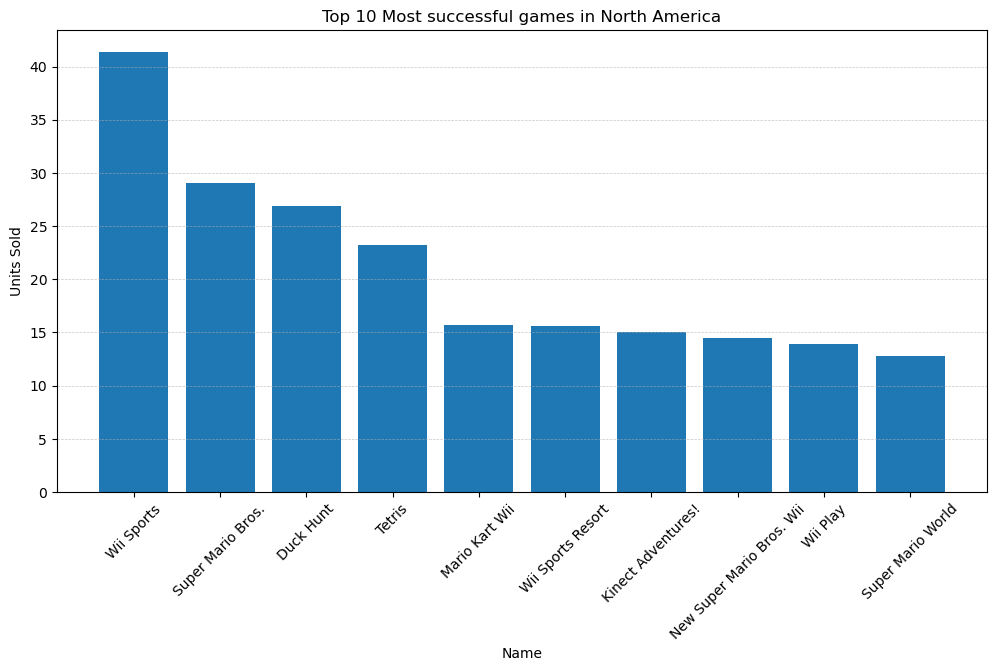

In [10]:
plt.figure(figsize=(12,6))

# Fields used to display the chart
plt.bar(topTen['Name'], topTen['NA_Sales'])

plt.title('Top 10 Most successful games in North America')
plt.xlabel('Name')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)

# Enable grid only on the y-axis for each unit
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

## Show the ten most successful games in North America by units sold released after 2010.
This question requires not only the sorting we've used so far but also a query to find release data, and a limitation of the number of records returned.

In [11]:
topGames = df.sort_values(by='NA_Sales', ascending=False)

after2010 = (topGames.query('Year_of_Release > 2010'))

tenAfter2010 = after2010.head(10)

print(tenAfter2010[['Name', 'NA_Sales', 'Year_of_Release']])

                              Name  NA_Sales  Year_of_Release
23              Grand Theft Auto V      9.66           2013.0
29  Call of Duty: Modern Warfare 3      9.04           2011.0
35      Call of Duty: Black Ops II      8.25           2012.0
16              Grand Theft Auto V      7.02           2013.0
60            Call of Duty: Ghosts      6.73           2013.0
66                          Halo 4      6.65           2012.0
31       Call of Duty: Black Ops 3      6.03           2015.0
61                    Just Dance 3      5.95           2011.0
72                       Minecraft      5.70           2013.0
37  Call of Duty: Modern Warfare 3      5.54           2011.0


### After getting the data in the dataframe we can plot the results.

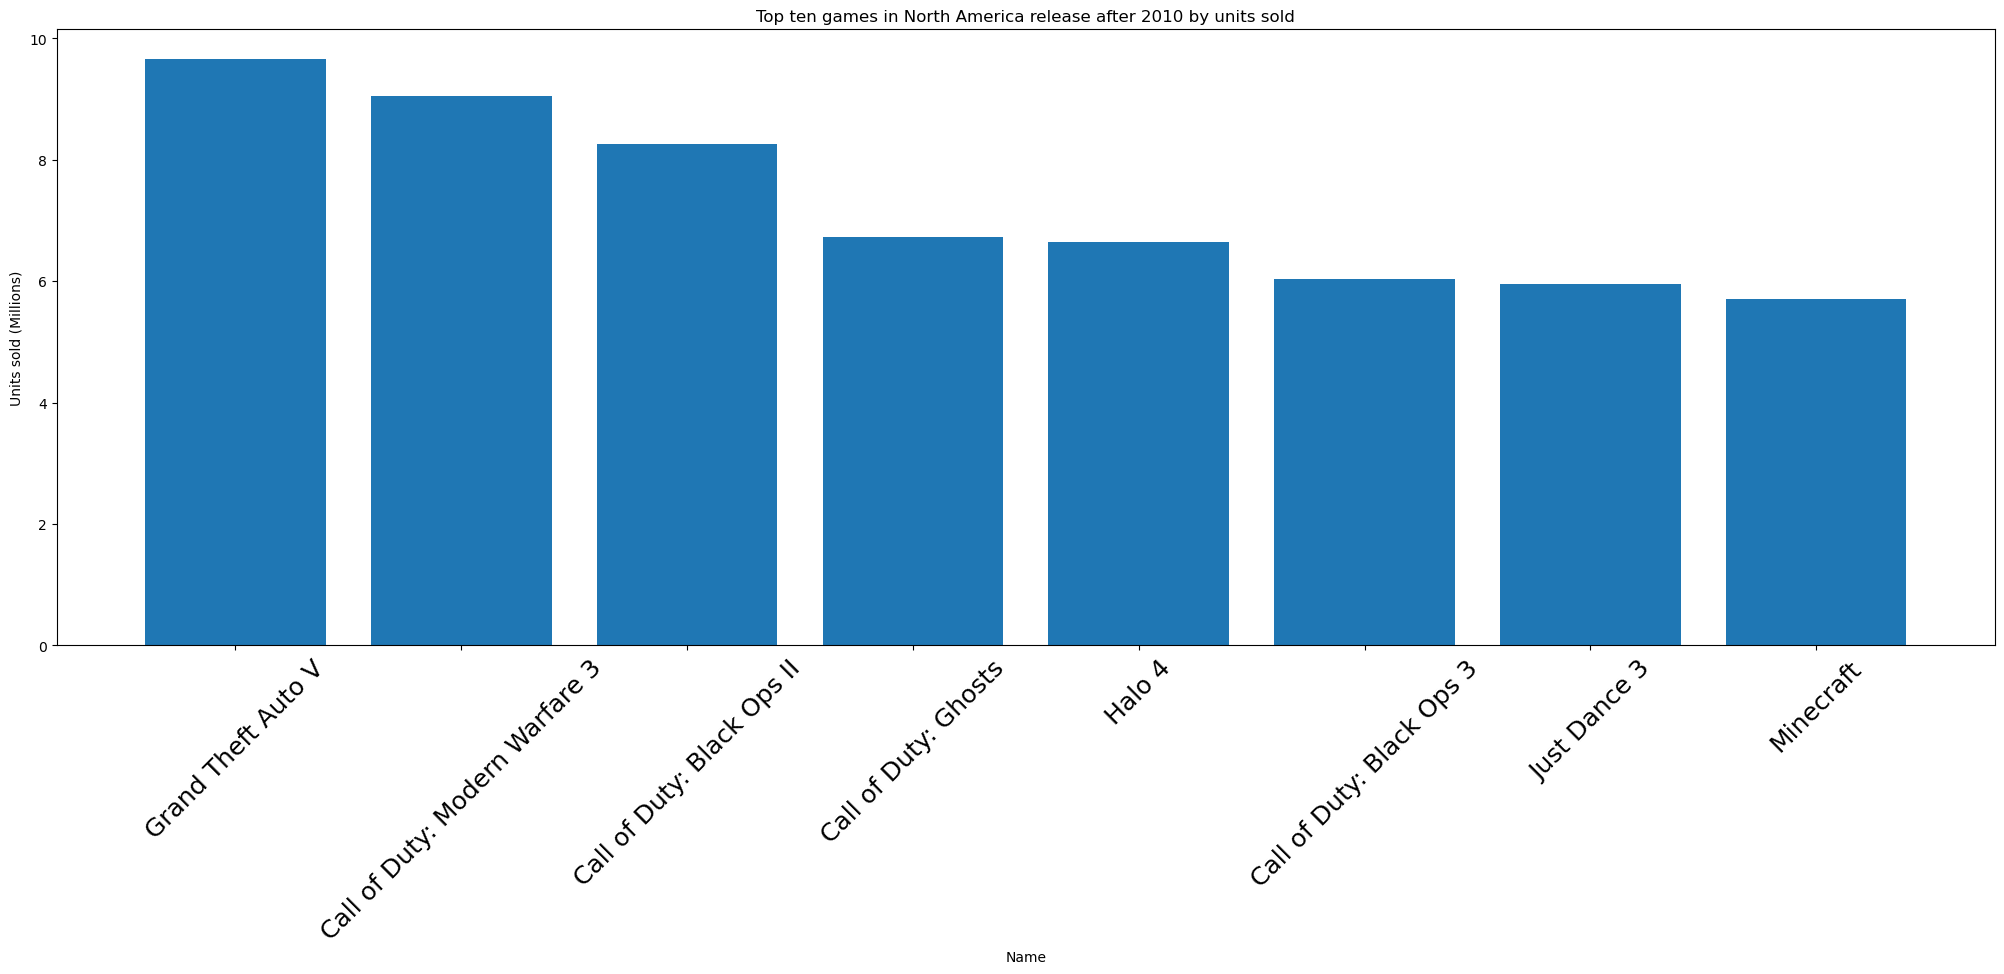

In [12]:
plt.figure(figsize=(25,8))

plt.bar(tenAfter2010['Name'], tenAfter2010['NA_Sales'])

plt.title('Top ten games in North America release after 2010 by units sold')
plt.xlabel('Name')
plt.xticks(rotation=45, fontsize=18)
plt.ylabel('Units sold (Millions)')
plt.show()

## What are the units sold for all games over the years represented in the data?
This question requires a simple grouping of the data by 'Year_of_Release', and 'Global_Sales'.

In [13]:
totalUnitsByYear = df.groupby('Year_of_Release')['Global_Sales'].sum()

print(totalUnitsByYear)

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64


### Once we have the data in a dataframe we can plot the results.

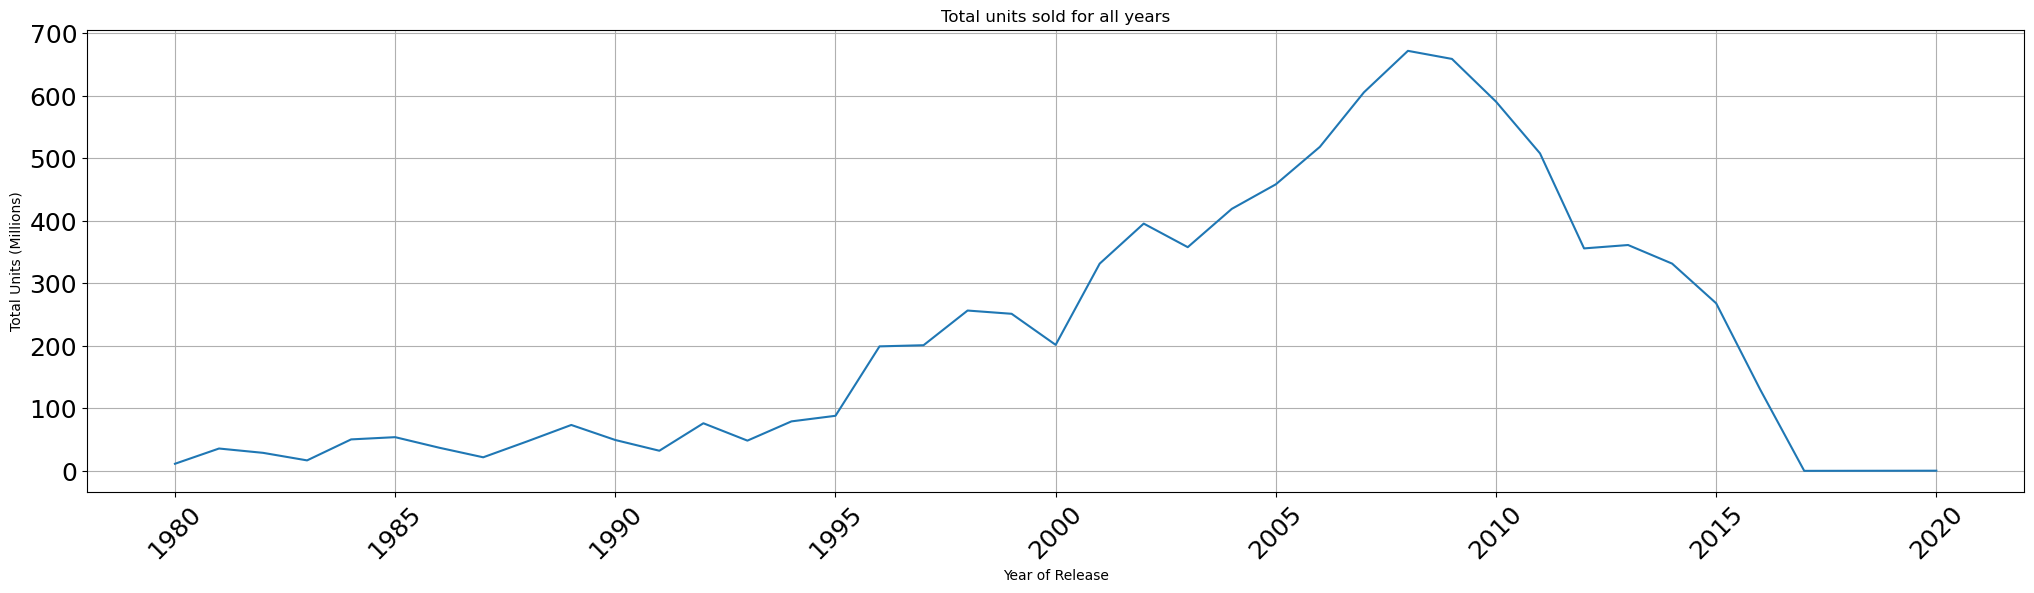

In [14]:
plt.figure(figsize=(25,6))

plt.plot(totalUnitsByYear.index, totalUnitsByYear.values)

plt.xlabel('Year of Release')
plt.xticks(rotation=45, fontsize=18)
plt.ylabel('Total Units (Millions)')
plt.yticks(fontsize=18)
plt.title('Total units sold for all years')
plt.grid()
plt.show()